## Q1. What is the purpose of grid search cv in machine learning, and how does it work?


Now we know what hyperparameters are the multiple combinations, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Here, we will discuss how Grid Seach is performed and how it is executed with cross-validation in GridSearchCV.

Grid Search employs an exhaustive search strategy, systematically exploring various combinations of specified hyperparameters and their Default values. This approach involves tuning parameters, such as learning rate, through a cross-validated model, which assesses performance across different parameter settings. However, due to its exhaustive nature, Grid Search can become time-consuming and resource-intensive, particularly as the number of hyperparameters increases.

<br>

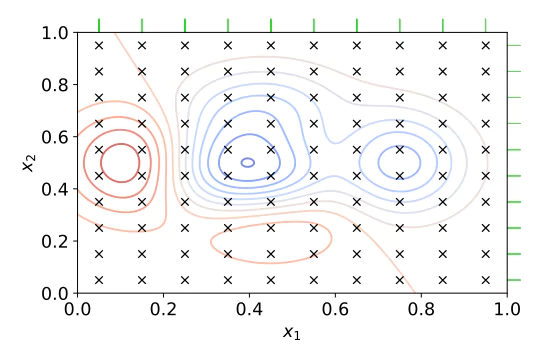

<br>

<b><u>How does GridSearchCV work?</u></b>:

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have the Scikit learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In this section, we shall see how to use GridSearchCV and also find out how it improves the performance of the model.

First, let us see what are the various arguments that are taken by GridSearchCV function:

In [ ]:
sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, 
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False) 


We are going to briefly describe a few of these parameters and the rest you can see on the original documentation:

1. estimator: Pass the model instance for which you want to check the hyperparameters.
2. params_grid: the dictionary object that holds the hyperparameters you want to try
3. scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4. cv: number of cross-validation you have to try for each selected set of hyperparameters
5. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6. n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

## Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?


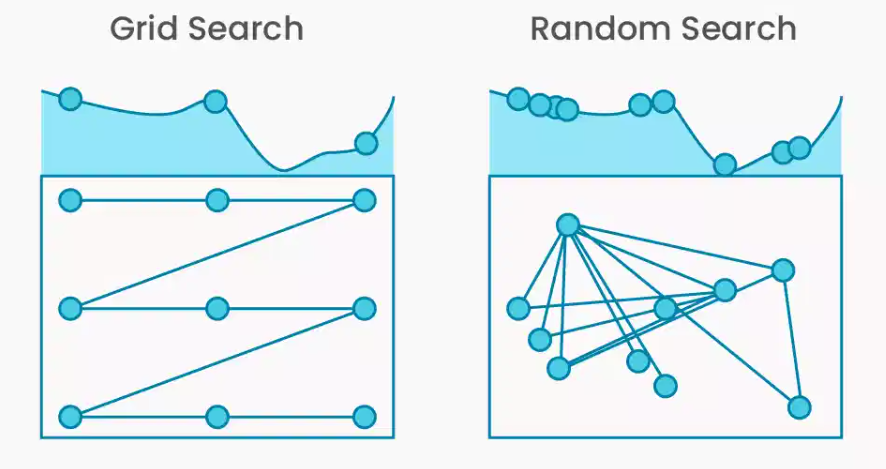

Both random search and grid search cross-validation are potent techniques for optimizing the hyperparameters of a machine learning model. They work by evaluating the model's performance on different combinations of hyperparameters to find the best combination that produces the highest performance on a validation set. These two approaches, meanwhile, vary in several significant ways.

One of the main differences between random search and grid search is the way they search the hyperparameter space. Grid search evaluates the model's performance on a predefined grid of hyperparameters, whereas random search samples hyperparameters randomly from a distribution. Grid search can be more efficient in cases where the hyperparameters are highly correlated and have a strong interaction effect, but it can be computationally expensive when the hyperparameter space is large. On the other hand, the random search can be more efficient when the hyperparameter space is large and the optimal hyperparameters are not highly correlated. Another difference between random search and grid search is the number of hyperparameters they can search. Grid search can search a large number of hyperparameters, but it can become computationally expensive as the number of hyperparameters increases. Random search, on the other hand, can search a larger number of hyperparameters without becoming too computationally expensive, as it samples hyperparameters randomly.

<br>

In terms of performance, there is no clear winner between random search and grid search. It depends on the specific problem and the hyperparameter space. Random search is generally more efficient when the hyperparameter space is large and the optimal hyperparameters are not highly correlated, whereas grid search is more efficient when the hyperparameters are highly correlated and have a strong interaction effect.


Source: https://360digitmg.com/blog/comparison-gridsearchcv-and-randomsearchcv

## Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.


Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate.

There are two main types of leakage: target leakage and train-test contamination.

<b>Target leakage</b>:

Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.

<b>Train-Test Contamination</b>:

A different type of leak occurs when you aren't careful to distinguish training data from validation data.

Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.

## Q4. How can you prevent data leakage when building a machine learning model?


To prevent data leakage, organizations must engage in careful data handling and systematic evaluation. Here are some essential practices:

<b>Data preprocessing</b>: To prevent information leakage between sets, apply preprocessing steps such as scaling or imputing missing values separately for training and test sets. Perform preprocessing such as scaling, encoding and imputation separately for training and test sets—automate pipelines when possible.

<b>Proper data splitting</b>: Split training and test sets correctly. A carefully planned train/test split protects information from the test set from leaking into the training phase. For time-dependent data, split chronologically to prevent future data from entering the training process. To check for leakage, maintain a separate and distinct validation set not used during training, representative of real-world data.

<b>Cross-validation</b>: Use k-fold cross-validation to test the model on multiple subsets of the data, which helps catch potential leakage and improves generalization.

<b>Feature engineering</b>: Avoid creating features that introduce future data. Review derived features to confirm that they reflect only what would be available at prediction time. Regularly assess feature relevance to confirm they are appropriate and do not introduce unavailable information at prediction time.

<b>Time-based validation</b>: For time-series data, use time-based validation to mimic real-world performance. This helps ensure that past data is used to predict future outcomes and avoids future data leakage. Handle time-series data with care, using methods such as rolling window validation or walk-forward validation to avoid leakage from future data during training.

<b>Regular model evaluation</b>: Continuously monitor performance during training and testing to detect any unexpected changes indicating leakage.

<br>

Source: https://www.ibm.com/think/topics/data-leakage-machine-learning#:~:text=Data%20preprocessing%3A%20To%20prevent%20information,sets%E2%80%94automate%20pipelines%20when%20possible.

## Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?


A confusion matrix is a simple table that shows how well a classification model is performing by comparing its predictions to the actual results. It breaks down the predictions into four categories: correct predictions for both classes (true positives and true negatives) and incorrect predictions (false positives and false negatives). This helps you understand where the model is making mistakes, so you can improve it.

The matrix displays the number of instances produced by the model on the test data.

* True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
* True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
* False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
* False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.

<br>


A confusion matrix helps you see how well a model is working by showing correct and incorrect predictions. It also helps calculate key measures like accuracy, precision, and recall, which give a better idea of performance, especially when the data is imbalanced.

1. <b>Accuracy</b>:
Accuracy measures how often the model’s predictions are correct overall. It gives a general idea of how well the model is performing. However, accuracy can be misleading, especially with imbalanced datasets where one class dominates. For example, a model that predicts the majority class correctly most of the time might have high accuracy but still fail to capture important details about other classes.

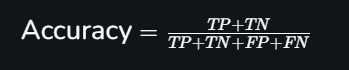

2. <b>Precision</b>:
Precision focuses on the quality of the model’s positive predictions. It tells us how many of the instances predicted as positive are actually positive. Precision is important in situations where false positives need to be minimized, such as detecting spam emails or fraud.

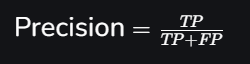

3. <b>Recall</b>:
Recall measures how well the model identifies all actual positive cases. It shows the proportion of true positives detected out of all the actual positive instances. High recall is essential when missing positive cases has significant consequences, such as in medical diagnoses.

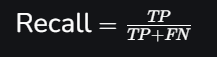

4. <b>F1-Score</b>:
F1-score combines precision and recall into a single metric to balance their trade-off. It provides a better sense of a model’s overall performance, particularly for imbalanced datasets. The F1 score is helpful when both false positives and false negatives are important, though it assumes precision and recall are equally significant, which might not always align with the use case.

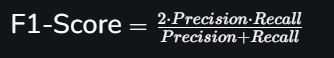

5. <b>Specificity</b>:
Specificity is another important metric in the evaluation of classification models, particularly in binary classification. It measures the ability of a model to correctly identify negative instances. Specificity is also known as the True Negative Rate. Formula is given by:

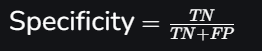

6. <b>Type 1 and Type 2 error</b>:

* Type 1 Error:

   A Type 1 Error occurs when the model incorrectly predicts a positive instance, but the actual instance is negative. This is also known as a false positive. Type 1 Errors affect the precision of a model, which measures the accuracy of positive predictions.

   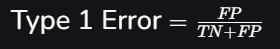

* <b>Type 2 Error</b>:

   A Type 2 Error occurs when the model fails to predict a positive instance, even though it is actually positive. This is also known as a false negative. Type 2 Errors impact the recall of a model, which measures how well the model identifies all actual positive cases.

   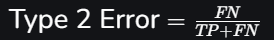


<br>

Source: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

## Q6. Explain the difference between precision and recall in the context of a confusion matrix.


* Precision and recall are two evaluation metrics used to measure the performance of a classifier in binary and multiclass classification problems.

* Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.

* High precision and high recall are desirable, but there may be a trade-off between the two metrics in some cases.

* Precision and recall should be used together with other evaluation metrics, such as accuracy and F1-score, to get a comprehensive understanding of the performance of a classifier.

## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?


A 2X2 Confusion matrix is shown below for the image recognition having a Dog image or Not Dog image:

<br>


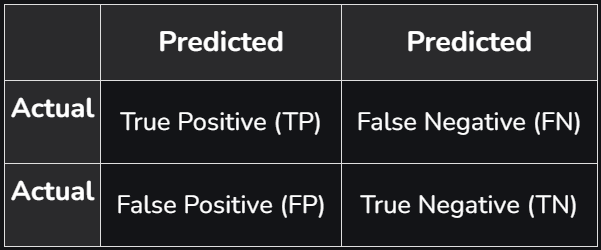

<br>

* Type 1 Error:

   A Type 1 Error occurs when the model incorrectly predicts a positive instance, but the actual instance is negative. This is also known as a false positive. Type 1 Errors affect the precision of a model, which measures the accuracy of positive predictions.

   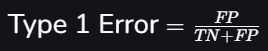

* <b>Type 2 Error</b>:

   A Type 2 Error occurs when the model fails to predict a positive instance, even though it is actually positive. This is also known as a false negative. Type 2 Errors impact the recall of a model, which measures how well the model identifies all actual positive cases.

   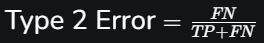

Example:

* Scenario: A diagnostic test is used to detect a particular disease in patients.

* Type 1 Error (False Positive):
This occurs when the test predicts a patient has the disease (positive result), but the patient is actually healthy (negative case).

* Type 2 Error (False Negative):
This occurs when the test predicts the patient is healthy (negative result), but the patient actually has the disease (positive case).


## Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

The matrix displays the number of instances produced by the model on the test data.

* True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
* True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
* False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
* False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.

<br>


A confusion matrix helps you see how well a model is working by showing correct and incorrect predictions. It also helps calculate key measures like accuracy, precision, and recall, which give a better idea of performance, especially when the data is imbalanced.

1. <b>Accuracy</b>:
Accuracy measures how often the model’s predictions are correct overall. It gives a general idea of how well the model is performing. However, accuracy can be misleading, especially with imbalanced datasets where one class dominates. For example, a model that predicts the majority class correctly most of the time might have high accuracy but still fail to capture important details about other classes.

  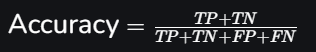

2. <b>Precision</b>:
Precision focuses on the quality of the model’s positive predictions. It tells us how many of the instances predicted as positive are actually positive. Precision is important in situations where false positives need to be minimized, such as detecting spam emails or fraud.

  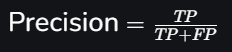

3. <b>Recall</b>:
Recall measures how well the model identifies all actual positive cases. It shows the proportion of true positives detected out of all the actual positive instances. High recall is essential when missing positive cases has significant consequences, such as in medical diagnoses.

  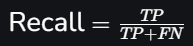

4. <b>F1-Score</b>:
F1-score combines precision and recall into a single metric to balance their trade-off. It provides a better sense of a model’s overall performance, particularly for imbalanced datasets. The F1 score is helpful when both false positives and false negatives are important, though it assumes precision and recall are equally significant, which might not always align with the use case.

  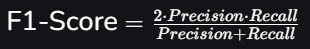

5. <b>Specificity</b>:
Specificity is another important metric in the evaluation of classification models, particularly in binary classification. It measures the ability of a model to correctly identify negative instances. Specificity is also known as the True Negative Rate. Formula is given by:

  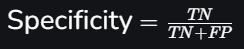

6. <b>Type 1 and Type 2 error</b>:

* Type 1 Error:

   A Type 1 Error occurs when the model incorrectly predicts a positive instance, but the actual instance is negative. This is also known as a false positive. Type 1 Errors affect the precision of a model, which measures the accuracy of positive predictions.

   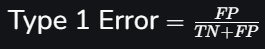

* <b>Type 2 Error</b>:

   A Type 2 Error occurs when the model fails to predict a positive instance, even though it is actually positive. This is also known as a false negative. Type 2 Errors impact the recall of a model, which measures how well the model identifies all actual positive cases.

   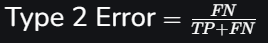


<br>

Source: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

## Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?


Model accuracy is not a wholly informative evaluation metric for classifiers. For instance, imagine we run a classifier on a data set of 100 instances. The model’s confusion matrix shows only one false negative and no false positives; the model correctly classifies every other data instance. Thus the model has an accuracy of 99%. Though ostensibly desirable, high accuracy is not in itself indicative of excellent model performance. For instance, say our model aims to classify highly contagious diseases. That 1% misclassification poses an enormous risk. Thus, other evaluation metrics can be used to provide a better picture of classification algorithm performance.

## Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?


<b><u>Challenges and Limitations</u></b>:

* Multiclass Classification: For classification problems with more than two classes, the confusion matrix expands and can become harder to interpret. Each class gets its row and column, making the analysis more complex.

* Imbalanced Data: If your dataset is imbalanced—where one class significantly outweighs the other—metrics like accuracy can be misleading. Instead, metrics like precision, recall, and F1 Score offer more insight.

<b><u>Solutions</u></b>: 

To overcome these challenges, consider using a normalized confusion matrix that shows percentages instead of absolute numbers, which can help make comparisons easier. Alternatively, consider resampling your data to balance the classes.